#LIBRARIES 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)

#DATASET PATH TRAIN,TEST

In [2]:
train_path = (r'C:\Users\abc\Desktop\Traffic_sign _classification_Recognition _Ramesh_Kumar\Train')
test_path = (r'C:\Users\abc\Desktop\Traffic_sign _classification_Recognition _Ramesh_Kumar\Test')
img_height = 30
img_width = 30
channels = 3

#FINDING TOTAL NUMBERS OF CLASSES

In [3]:
num_categories = len(os.listdir(train_path))
num_categories

43

#LABEL

In [4]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

#DATASET VISUALIZION

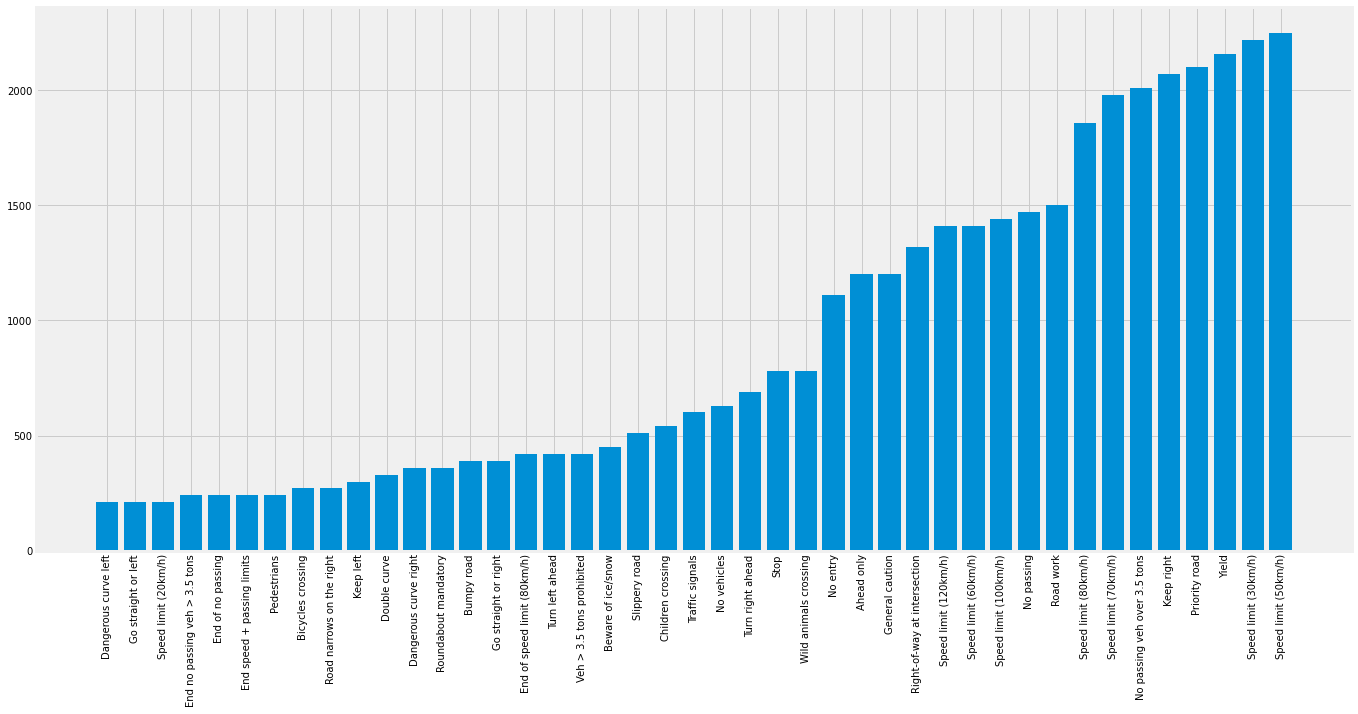

In [5]:
folders = os.listdir(train_path)
train_number = []
class_num = []
for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]
# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

#FROM TEST DATA, VISUALIZING 25 RANDOM IMAGES

C:\Users\abc\AppData\Local\Temp\ipykernel_4272\1256017970.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


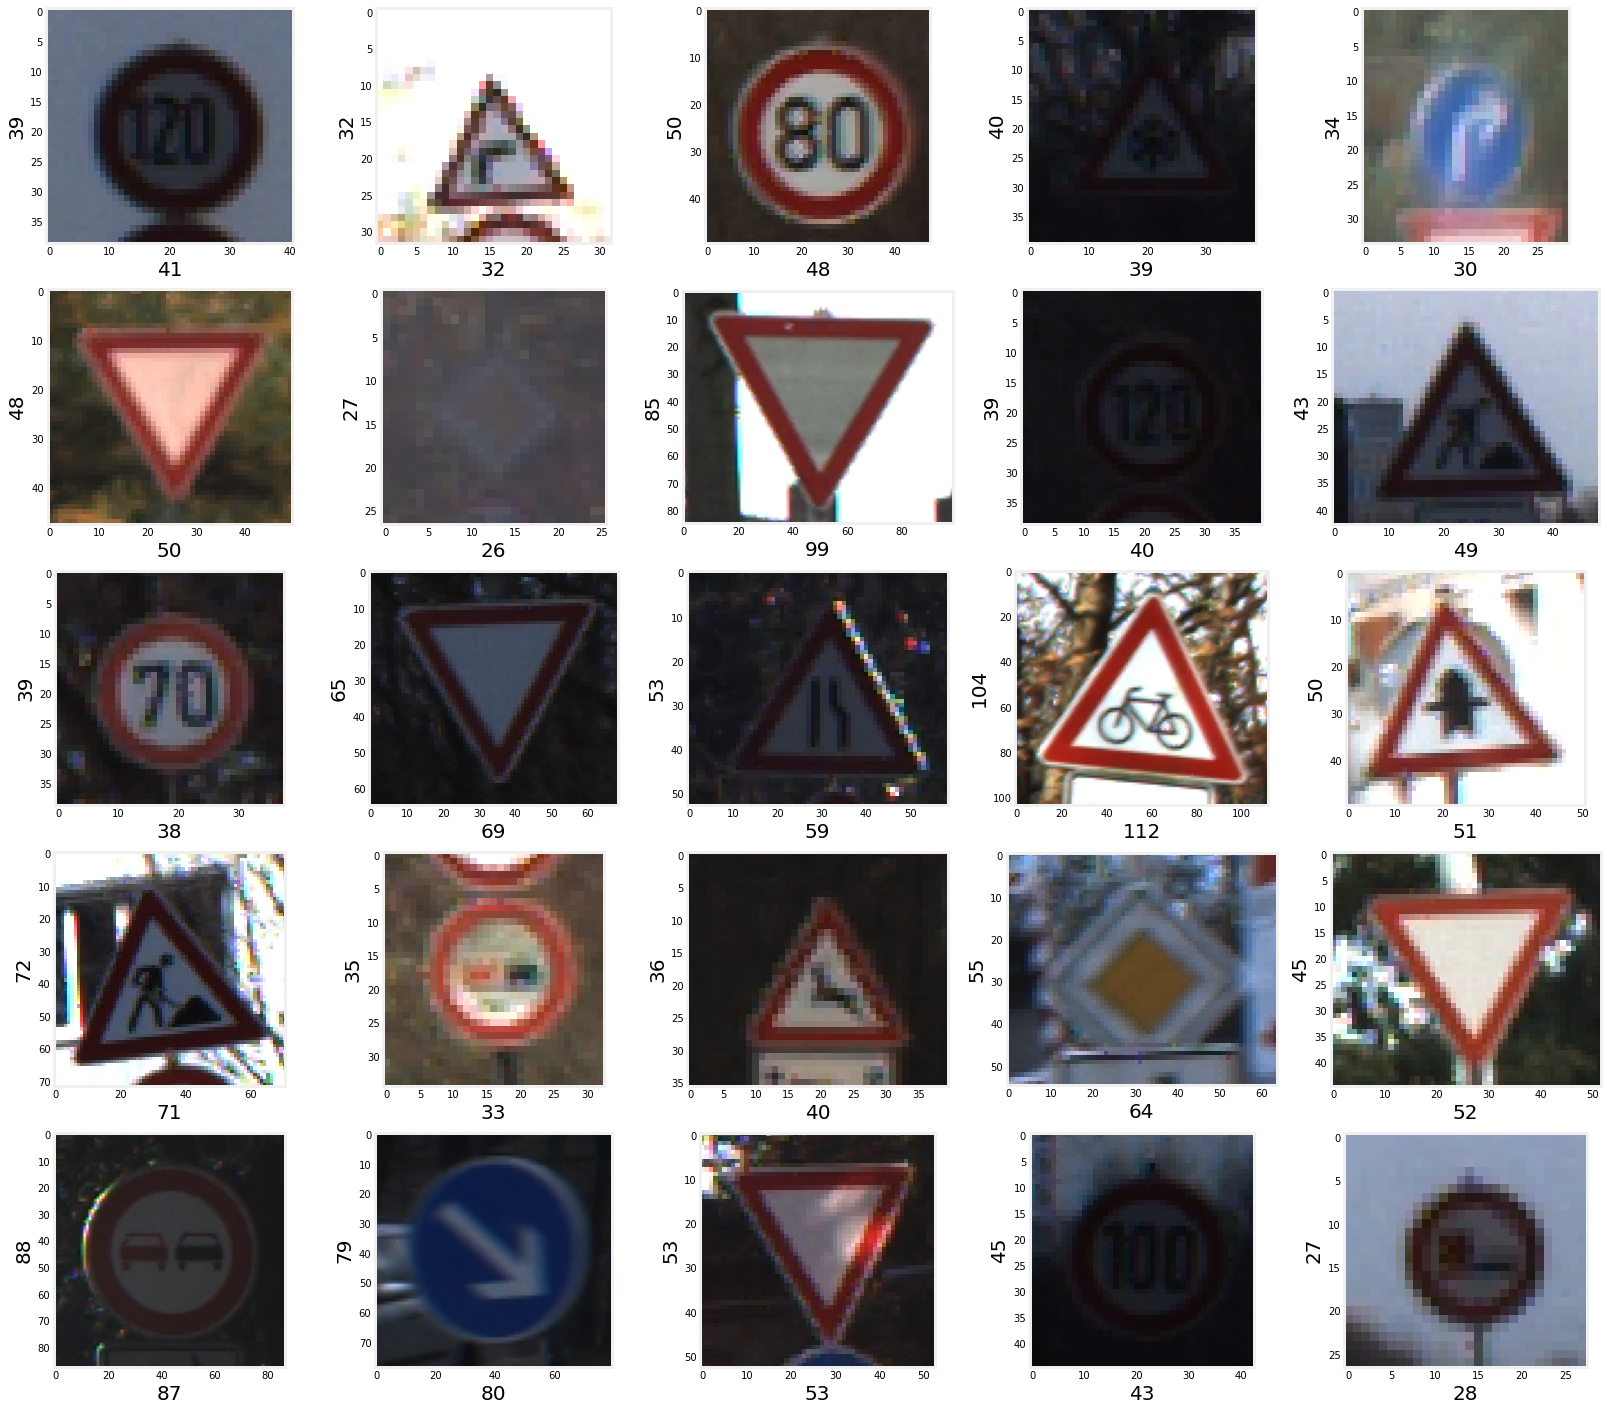

In [6]:
import random
from matplotlib.image import imread
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values
plt.figure(figsize=(25,25))
for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

#COLLECTING THE TRAINING DATA

In [7]:
image_data = []
image_labels = []
for i in range(num_categories):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((img_height, img_width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)
# list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


#SHUFFLING THE TRAINING DATA

In [8]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

#SPLITTING THE DATA INTO TRAIN AND VALIDATION

In [9]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


#ONNEHOTENCODING THE LABELS

In [10]:
y_train = keras.utils.to_categorical(y_train, num_categories)
y_val = keras.utils.to_categorical(y_val, num_categories)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


#MODEL

In [11]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(img_height,img_width,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(43, activation='softmax')
])

In [12]:
lr = 0.001
epochs = 30

opt =Adam(lr=lr, decay=lr / (epochs * 0.5)) #change keras.optimizers
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\abc\anaconda3\envs\tf\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


#AUGMENTING THE DATA AND TRAINING THE MODEL

In [13]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 241s 267ms/step - loss: 0.9741 - accuracy: 0.7331 - val_loss: 0.1184 - val_accuracy: 0.9664
Epoch 2/30
858/858 [==============================] - 236s 275ms/step - loss: 0.1813 - accuracy: 0.9464 - val_loss: 0.0340 - val_accuracy: 0.9902
Epoch 3/30
858/858 [==============================] - 244s 284ms/step - loss: 0.1129 - accuracy: 0.9658 - val_loss: 0.0430 - val_accuracy: 0.9852
Epoch 4/30
858/858 [==============================] - 245s 285ms/step - loss: 0.0911 - accuracy: 0.9720 - val_loss: 0.0198 - val_accuracy: 0.9942
Epoch 5/30
858/858 [==============================] - 251s 292ms/step - loss: 0.0699 - accuracy: 0.9786 - val_loss: 0.0123 - val_accuracy: 0.9969
Epoch 6/30
858/858 [==============================] - 246s 287ms/step - loss: 0.0513 - accuracy: 0.9846 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 7/30
858/858 [==============================] - 237s 276ms/step - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0209 -

In [14]:
model.save("model.h5")

#EVALUATING THE MODEL

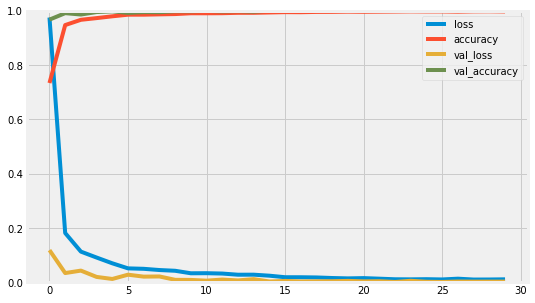

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#TEST DATA, PREDICTIONS, ACCURACY

In [23]:
test = pd.read_csv(data_dir + '/Test.csv')
labels = test["ClassId"].values
imgs = test["Path"].values
data =[]
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((img_height, img_width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255
pred = np.argmax(model.predict(X_test), axis=-1)
#Accuracy(test data) 
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  98.51148060174188


#CONFUSION MATRIX

<AxesSubplot:>

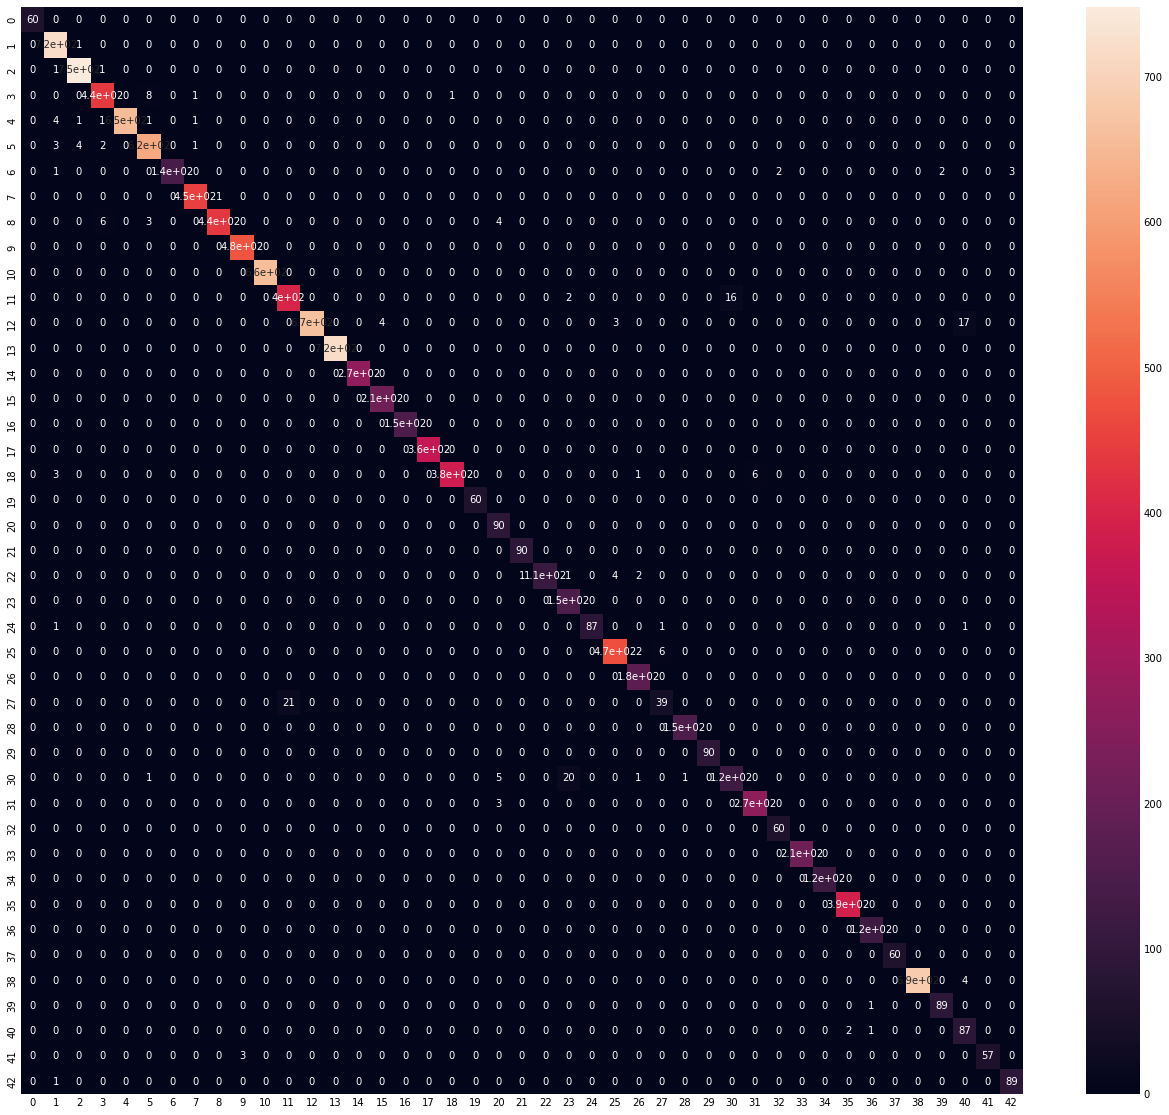

In [26]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

#CLASSIFICATION REPORT

In [27]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      1.00      0.99       720
           2       0.99      1.00      0.99       750
           3       0.98      0.98      0.98       450
           4       1.00      0.99      0.99       660
           5       0.98      0.98      0.98       630
           6       1.00      0.95      0.97       150
           7       0.99      1.00      1.00       450
           8       1.00      0.97      0.98       450
           9       0.99      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.95      0.96      0.95       420
          12       1.00      0.97      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

#ACTUAL AND PREDICTED VALUE OF TEST DATASET

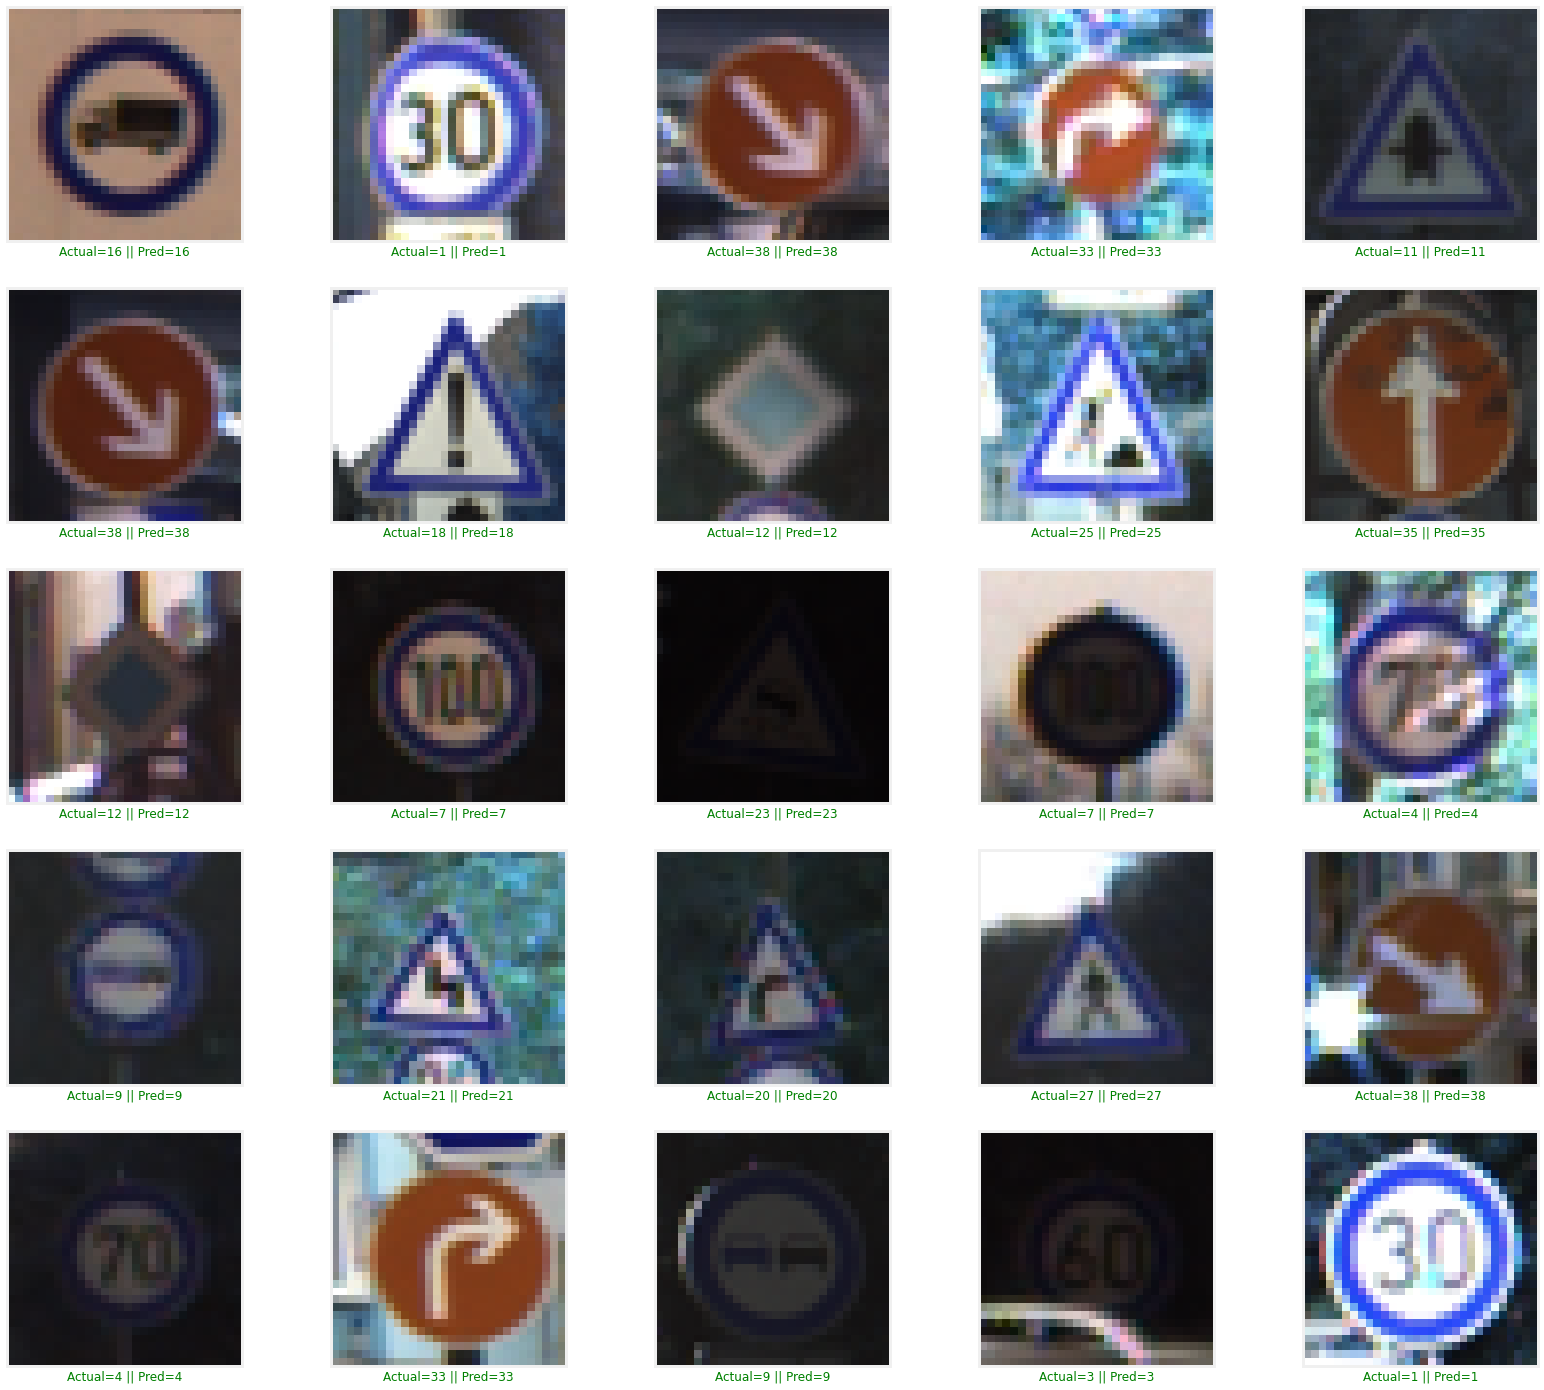

In [28]:
plt.figure(figsize = (25, 25))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()